In [1]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from transformers import pipeline

In [2]:
posts_df = pd.read_csv('data/ds_ml_ai_reddit_posts.csv')
comments_df = pd.read_csv("data/ds_ml_ai_reddit_comments.csv")

In [3]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96


In [4]:
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year

In [5]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99,2020-05-10 10:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98,2021-01-10 07:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97,2020-04-25 01:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96,2021-07-11 01:18:59,2021


In [6]:
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how = 'left')

comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

## EDA

In [ ]:
# Fazer eda depois

## Wordcloud

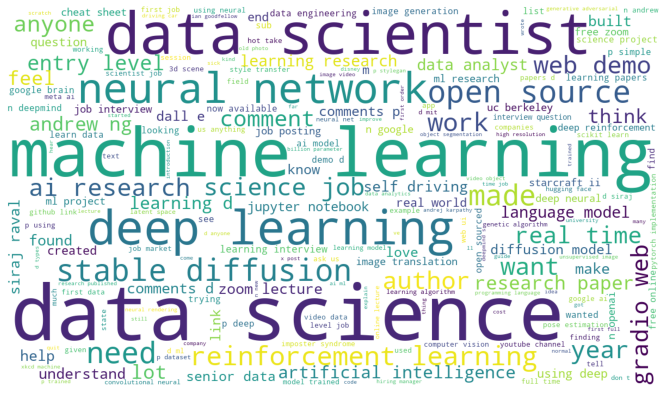

In [7]:
post_title_text = " ".join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1200, height=700,
                       background_color='white').generate(post_title_text)

plt.figure(figsize=(12,7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [11]:
# Build word cloud by year interactively

## Sentiment analysis

In [8]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

c:\Users\Naruhiko\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Naruhiko\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Naruhiko\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:147: UserWarning: Fai

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [48]:
def get_sentiment(text):
    # get sentiment prediciont socres
    try:
        sentiment = sentiment_classifier(text)
    except:
        sentiment = 'Not classified'
    
    return sentiment

In [49]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains('job')]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
5084,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,The model straight up generated what it feels ...
5085,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,https://www.twitter.com/dreamjobsbot
5086,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,This is more like a deep mind nightmare
5087,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,An explanation of what models you used and/or ...
5088,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,Is that slenderman?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154693,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,You are right. I talked to a few recruiters an...
154694,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,Phew luckily i did not put anything on my port...
154695,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,aw man even if its a new grad catered analytic...
154696,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,Awesome. Thank you for taking the time to answ...


In [50]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))

C:\Users\Naruhiko\AppData\Local\Temp\ipykernel_39076\3455420292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


In [47]:
get_sentiment('I love you')

'Not classified'

In [45]:
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
5084,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,The model straight up generated what it feels ...,Not classified
5085,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,https://www.twitter.com/dreamjobsbot,Not classified
5086,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,This is more like a deep mind nightmare,Not classified
5087,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,An explanation of what models you used and/or ...,Not classified
5088,s4tu5x,MachineLearning,1.642280e+09,NaN,https://i.redd.it/fc7mxpozywb81.jpg,[P] I made an AI twitter bot that draws people...,Project,2662,75,0.97,2022-01-15 17:47:13,2022,Is that slenderman?,Not classified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154693,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,You are right. I talked to a few recruiters an...,Not classified
154694,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,Phew luckily i did not put anything on my port...,Not classified
154695,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,aw man even if its a new grad catered analytic...,Not classified
154696,xlvr0l,datascience,1.663935e+09,I see all these job postings on LinkedIn with ...,https://www.reddit.com/r/datascience/comments/...,Who is applying to all these data scientist jobs?,Job Search,362,274,0.88,2022-09-23 09:07:18,2022,Awesome. Thank you for taking the time to answ...,Not classified


In [39]:
from lets_plot import *
from lets_plot.mapping import *

In [46]:
LetsPlot.setup_html()

ggplot(comments_posts_df_sub) \
    + geom_pie(aes(fill = as_discrete('sentiment')),
               size = 30, hole = 0.2, stroke = 1.0,
               labels = layer_labels()
                        .line('@sentiment')
                        .line('(@{..prop..})')
                        .format('..prop..', '.0%')) \
    + theme(line = element_blank(),
            axis_text = element_blank(),
            axis_title = element_blank(),
            legend_position = 'none') \
    + ggtitle('Sentiment of around the topic')


In [27]:
comments_posts_df_sub['sentiment'].value_counts()

Series([], Name: sentiment, dtype: int64)

## Emotion recognition

In [35]:
emotion_classifier = pipeline('text_classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores = True)

'Not classified'